In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    print("q",[s[0][0] for s in admitted])
    print("a-------------",admitted)
    print("r--------------",rejected)
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

          0         1  2
0   0.78051 -0.063669  1
1   0.28774  0.291390  1
2   0.40714  0.178780  1
3   0.29230  0.421700  1
4   0.50922  0.352560  1
..      ...       ... ..
95  0.77029  0.701400  0
96  0.73156  0.717820  0
97  0.44556  0.579910  0
98  0.85275  0.859870  0
99  0.51912  0.623590  0

[100 rows x 3 columns]
q [0.78051, 0.28774, 0.40714, 0.2923, 0.50922, 0.27785, 0.27527, 0.43999, 0.33557, 0.23448, 0.0084492, 0.12419, 0.25644, 0.4591, 0.44547, 0.42218, 0.49563, 0.30848, 0.39707, 0.32945, 0.40739, 0.3106, 0.49638, 0.10073, 0.69907, 0.29767, 0.15099, 0.16427, 0.33259, 0.53741, 0.19503, 0.40278, 0.21296, 0.48447, 0.25476, 0.21726, 0.67078, 0.3815, 0.53838, 0.4849, 0.37095, 0.54527, 0.32149, 0.42216, 0.10194, 0.15254, 0.45558, 0.28488, 0.27633, 0.39748]
a------------- [[[ 0.78051   -0.063669 ]]

 [[ 0.28774    0.29139  ]]

 [[ 0.40714    0.17878  ]]

 [[ 0.2923     0.4217   ]]

 [[ 0.50922    0.35256  ]]

 [[ 0.27785    0.10802  ]]

 [[ 0.27527    0.33223  ]]

 [[ 0.43999    

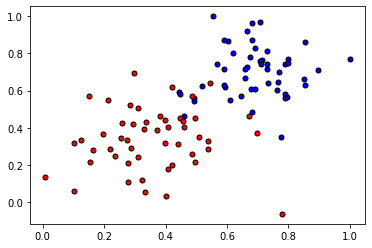

In [2]:
#reading the file 
data = pd.read_csv('/Users/saurav/Desktop/gradientalgorithm/data.csv', header= None)
print(data)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

In [3]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    d_error = y - output
    weights += learnrate * d_error * x
    bias += learnrate * d_error
    return weights, bias



In [4]:
#training function
#This function will help us iterate the gradient descent algorithm through all the data, for a number of epochs. 
#It will also plot the data, and some of the boundary lines obtained as we run the algorithm.

np.random.seed(44)
epochs = 100
learning_rate = 0.01

def train(features, targets, epochs, learnrate= learning_rate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape #rows and columsn
    #print(n_records)
    
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            
            # Converting the output (float) to boolean as it is a binary classification
            # e.g. 0.95 --> True (= 1), 0.31 --> False (= 0)
            predictions = out > 0.5
            
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()
    



========== Epoch 0 ==========
Train loss:  0.7135845195381634
Accuracy:  0.4

========== Epoch 10 ==========
Train loss:  0.6225835210454962
Accuracy:  0.59

========== Epoch 20 ==========
Train loss:  0.5548744083669507
Accuracy:  0.74

========== Epoch 30 ==========
Train loss:  0.501606141872473
Accuracy:  0.84

========== Epoch 40 ==========
Train loss:  0.45933346418614013
Accuracy:  0.86

========== Epoch 50 ==========
Train loss:  0.42525543433469976
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.39734615716713984
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.37414697652390744
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.35459973368161973
Accuracy:  0.94

========== Epoch 90 ==========
Train loss:  0.33792736588799216
Accuracy:  0.94
q [0.78051, 0.28774, 0.40714, 0.2923, 0.50922, 0.27785, 0.27527, 0.43999, 0.33557, 0.23448, 0.0084492, 0.12419, 0.25644, 0.4591, 0.44547, 0.42218, 0.49563, 0.30848, 0.39707, 0.32945, 0.40739, 0.310

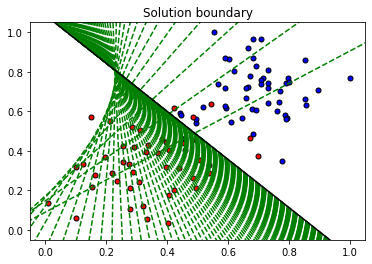

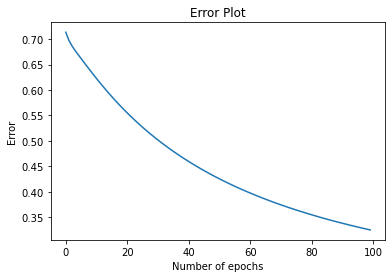

In [5]:
#train the algorithm

train(X, y, epochs, learning_rate, True)

In [6]:
#Predicting Student Admissions with Neural Networks

# Importing pandas and numpy
import pandas as pd
import numpy as np

# Reading the csv file into a pandas DataFrame
data= pd.read_csv("/Users/saurav/Desktop/gradientalgorithm/student_data.csv")

# Printing out the first 10 rows of our data
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


admitted [[[660.     3.67]]

 [[800.     4.  ]]

 [[640.     3.19]]

 [[760.     3.  ]]

 [[560.     2.98]]

 [[540.     3.39]]

 [[760.     4.  ]]

 [[700.     4.  ]]

 [[540.     3.81]]

 [[660.     3.63]]

 [[760.     3.35]]

 [[800.     3.66]]

 [[620.     3.61]]

 [[520.     3.74]]

 [[780.     3.22]]

 [[800.     4.  ]]

 [[500.     3.13]]

 [[520.     2.68]]

 [[580.     3.32]]

 [[600.     3.15]]

 [[460.     3.45]]

 [[580.     3.46]]

 [[680.     3.27]]

 [[740.     4.  ]]

 [[620.     3.18]]

 [[680.     3.85]]

 [[800.     4.  ]]

 [[620.     4.  ]]

 [[500.     3.6 ]]

 [[660.     4.  ]]

 [[720.     3.64]]

 [[660.     3.44]]

 [[660.     3.95]]

 [[740.     2.97]]

 [[700.     3.56]]

 [[440.     3.45]]

 [[800.     3.7 ]]

 [[520.     3.74]]

 [[480.     2.67]]

 [[600.     3.54]]

 [[620.     3.17]]

 [[600.     3.58]]

 [[700.     3.52]]

 [[480.     2.91]]

 [[800.     3.74]]

 [[640.     3.94]]

 [[580.     2.86]]

 [[480.     3.58]]

 [[700.     3.56]]

 [[800.    

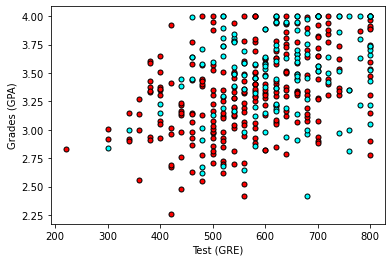

In [7]:
# %matplotlib inline
import matplotlib.pyplot as plt

# Function to help us plot
def plot_points(data):
    X = np.array(data[["gre","gpa"]])
    y = np.array(data["admit"])
    admitted = X[np.argwhere(y==1)]
    #print("indices of the admitted", np.argwhere(y==1))
    print("admitted", X[np.argwhere(y==1)])
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')
    
# Plotting the points
plot_points(data)
plt.show()


admitted [[[800.     4.  ]]

 [[560.     2.98]]

 [[760.     4.  ]]

 [[700.     4.  ]]

 [[540.     3.81]]

 [[800.     3.66]]

 [[620.     3.61]]

 [[620.     4.  ]]

 [[720.     3.64]]

 [[700.     3.56]]

 [[800.     3.7 ]]

 [[600.     3.54]]

 [[600.     3.58]]

 [[480.     2.91]]

 [[800.     3.74]]

 [[480.     3.58]]

 [[700.     4.  ]]

 [[600.     3.89]]

 [[640.     3.63]]

 [[460.     3.64]]

 [[480.     3.02]]

 [[800.     3.53]]

 [[520.     3.81]]

 [[580.     3.58]]

 [[800.     3.22]]

 [[540.     3.17]]

 [[620.     3.71]]

 [[760.     2.81]]

 [[520.     4.  ]]

 [[540.     3.49]]

 [[560.     3.36]]

 [[680.     2.42]]

 [[620.     3.37]]]


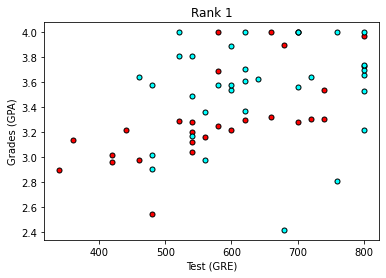

admitted [[[760.     3.  ]]

 [[660.     3.63]]

 [[760.     3.35]]

 [[780.     3.22]]

 [[500.     3.13]]

 [[580.     3.32]]

 [[600.     3.15]]

 [[580.     3.46]]

 [[680.     3.27]]

 [[620.     3.18]]

 [[660.     4.  ]]

 [[660.     3.44]]

 [[660.     3.95]]

 [[740.     2.97]]

 [[440.     3.45]]

 [[520.     3.74]]

 [[480.     2.67]]

 [[620.     3.17]]

 [[640.     3.94]]

 [[700.     3.56]]

 [[800.     3.43]]

 [[620.     3.37]]

 [[540.     3.84]]

 [[640.     2.94]]

 [[600.     3.47]]

 [[580.     3.2 ]]

 [[600.     3.56]]

 [[560.     3.59]]

 [[720.     3.42]]

 [[660.     3.49]]

 [[520.     4.  ]]

 [[520.     3.3 ]]

 [[680.     3.46]]

 [[640.     3.95]]

 [[680.     3.67]]

 [[600.     2.98]]

 [[660.     3.14]]

 [[440.     3.39]]

 [[620.     3.45]]

 [[400.     3.15]]

 [[680.     3.98]]

 [[300.     2.84]]

 [[340.     3.  ]]

 [[560.     3.48]]

 [[780.     4.  ]]

 [[540.     3.78]]

 [[540.     3.77]]

 [[800.     4.  ]]

 [[540.     3.49]]

 [[480.    

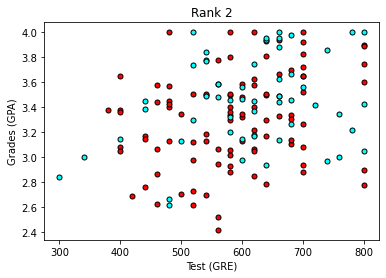

admitted [[[660.     3.67]]

 [[540.     3.39]]

 [[800.     4.  ]]

 [[520.     2.68]]

 [[460.     3.45]]

 [[740.     4.  ]]

 [[680.     3.85]]

 [[800.     4.  ]]

 [[500.     3.6 ]]

 [[620.     3.23]]

 [[780.     3.8 ]]

 [[660.     2.91]]

 [[720.     3.5 ]]

 [[680.     2.96]]

 [[620.     3.95]]

 [[520.     3.19]]

 [[620.     3.95]]

 [[520.     3.9 ]]

 [[600.     3.64]]

 [[660.     3.6 ]]

 [[460.     3.64]]

 [[660.     3.47]]

 [[560.     2.65]]

 [[580.     3.12]]

 [[560.     3.69]]

 [[680.     3.76]]

 [[600.     3.38]]

 [[460.     3.99]]]


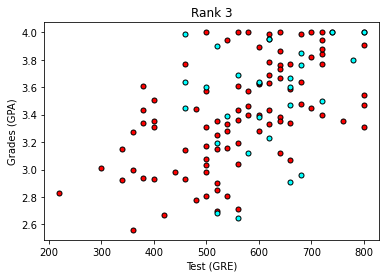

admitted [[[640.     3.19]]

 [[520.     3.74]]

 [[700.     3.52]]

 [[580.     2.86]]

 [[400.     3.23]]

 [[540.     3.55]]

 [[740.     3.52]]

 [[680.     3.  ]]

 [[660.     3.7 ]]

 [[520.     3.65]]

 [[780.     3.63]]

 [[480.     3.71]]]


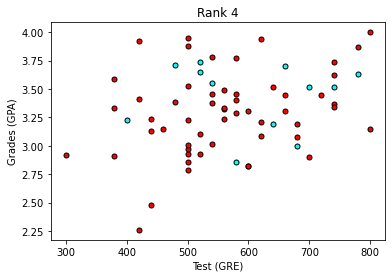

In [8]:
# Separating the ranks
data_rank1 = data[data["rank"]==1]
#print(data_rank1)
data_rank2 = data[data["rank"]==2]
data_rank3 = data[data["rank"]==3]
data_rank4 = data[data["rank"]==4]

# Plotting the graphs
plot_points(data_rank1)
plt.title("Rank 1")
plt.show()
plot_points(data_rank2)
plt.title("Rank 2")
plt.show()
plot_points(data_rank3)
plt.title("Rank 3")
plt.show()
plot_points(data_rank4)
plt.title("Rank 4")
plt.show()

In [9]:
## One solution
# Make dummy variables for rank
#Use the get_dummies function in pandas in order to one-hot encode the data.
one_hot_data = pd.concat([data, pd.get_dummies(data['rank'], prefix='rank')], axis=1)

# Drop the previous rank column
one_hot_data = one_hot_data.drop('rank', axis=1)

# Print the first 10 rows of our data
one_hot_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1
5,1,760,3.00,0,1,0,0
6,1,560,2.98,1,0,0,0
7,0,400,3.08,0,1,0,0
8,1,540,3.39,0,0,1,0
9,0,700,3.92,0,1,0,0


In [10]:
#Scaling the data

# Copying our data
processed_data = one_hot_data[:]

# Scaling the columns
processed_data['gre'] = processed_data['gre']/800
processed_data['gpa'] = processed_data['gpa']/4.0
processed_data[:10]


                  
                  


,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.9025,0,0,1,0
1,1,0.825,0.9175,0,0,1,0
2,1,1.000,1.0000,1,0,0,0
3,1,0.800,0.7975,0,0,0,1
4,0,0.650,0.7325,0,0,0,1
5,1,0.950,0.7500,0,1,0,0
6,1,0.700,0.7450,1,0,0,0
7,0,0.500,0.7700,0,1,0,0
8,1,0.675,0.8475,0,0,1,0
9,0,0.875,0.9800,0,1,0,0


In [11]:
print(processed_data.index)

RangeIndex(start=0, stop=400, step=1)


In [12]:
#Splitting the data into Training and Testing
#In order to test our algorithm, we'll split the data into a Training and a Testing set.
#The size of the testing set will be 10% of the total data.
# np.random.choice(can be range or array or number, size, replace = False (no duplicate))
# eg; np.random.choice(5, 3, replace=True) output: [3,1,0]
# eg;aa_milne_arr = ['pooh', 'rabbit', 'piglet', 'Christopher']
# np.random.choice(aa_milne_arr, 5, p=[0.5, 0.1, 0.1, 0.3]) output: ['pooh', 'pooh', 'pooh', 'Christopher', 'piglet']
sample = np.random.choice(processed_data.index, size=int(len(processed_data)*0.9), replace=False)
print(sample)

#df.iloc[[0]] gives the data of the 0th row
#output:
   #a  b  c  d
#0  1  2  3  4
train_data, test_data = processed_data.iloc[sample], processed_data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))
print(train_data[:10])
print(test_data[:10])

[263 304 172 379 290 261 186 274  43   7 202  83 219 279 294 175 241 193
 265 238 280  88 134 347  71  38 179 295 163 231 206 124 323  76 383 277
 237  68 313 275 334 384 149 264   9 205  16  85 125  30 230 135 225 168
 372 338 325 133 183 211 122 156 352 317 176 218 139 394  33 360  87  78
 310 385 351 283 228 396 354 107 166 281 322 240 377 142 161 217 318 236
  46 337  41 171  52  90 203 314 115 232 243 399 114 173  28 366   6  20
 276  91 278 367 364 375  35 270  44 389 159  69 131  61 182 316  84  49
 370  12 332  94 320 259 254  81 392 358 361 269 224  77 162 344  97 221
 157 333  54 146 302 111  93 335 113 348   2  36  65 381 187 246 169 357
 117 137 329 223 297 143 212  51 174 356 309 288 373 208  24 253 250  45
 282 102 155 244 106  47 110 136 108  64 386 284 262  79  73 201 298  95
 266  23  48   5 331  39   3 365  32  11 216 286 181 105  98 324 165 191
 185 308  58 258  55 292 153  19 301 160 336 395 207 342 390 251  13 273
  59 293 103 154 152 204 362 145 256 398  56 192 19

In [13]:
#Splitting the data into features(x) and targets (labels i.e. y)
features = train_data.drop('admit', axis=1)
targets = train_data['admit']
print(targets)
features_test = test_data.drop('admit', axis=1)
targets_test = test_data['admit']

print(features[:10])
print(targets[:10])

263    1
304    0
172    0
379    0
290    1
      ..
164    0
233    0
8      1
305    0
312    0
Name: admit, Length: 360, dtype: int64
       gre     gpa  rank_1  rank_2  rank_3  rank_4
263  0.775  0.9875       0       0       1       0
304  0.275  0.7075       0       0       1       0
172  0.850  0.8700       0       0       1       0
379  0.675  0.6750       0       1       0       0
290  0.775  0.8625       0       1       0       0
261  0.550  0.7875       0       1       0       0
186  0.700  0.9025       0       0       1       0
274  0.650  0.7800       0       1       0       0
43   0.625  0.8275       0       0       1       0
7    0.500  0.7700       0       1       0       0
263    1
304    0
172    0
379    0
290    1
261    0
186    0
274    0
43     0
7      0
Name: admit, dtype: int64


In [14]:
#Training the one layer Neural Network
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_prime(x):
    return sigmoid(x) * (1-sigmoid(x))
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

In [15]:
#Back Propagation
def error_term_formula(x, y, output):
#    for binary cross entropy loss
    return (y - output)*x
#    for mean square error
#    return (y - output)*sigmoid_prime(x)*x

In [16]:
# Neural Network hyperparameters
epochs = 1000
learnrate = 0.0001

# Training function
def train_nn(features, targets, epochs, learnrate):
    
    # Use to same seed to make debugging easier
    np.random.seed(42)

    n_records, n_features = features.shape
    last_loss = None

    # Initialize weights
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features.values, targets):
            # Loop through all records, x is the input, y is the target

            # Activation of the output unit
            #   Notice we multiply the inputs and the weights here 
            #   rather than storing h as a separate variable 
            output = sigmoid(np.dot(x, weights))

            # The error term
            error_term = error_term_formula(x, y, output)

            # The gradient descent step, the error times the gradient times the inputs
            del_w += error_term

        # Update the weights here. The learning rate times the 
        # change in weights
        # don't have to divide by n_records since it is compensated by the learning rate
        weights += learnrate * del_w #/ n_records  

        # Printing out the mean square error on the training set
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean(error_formula(targets, out))
            print("Epoch:", e)
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            print("=========")
   

    print("Finished training!")
    return weights
    
weights = train_nn(features, targets, epochs, learnrate)

Epoch: 0
Train loss:  0.743864038266761
Epoch: 100
Train loss:  0.6271952908360601
Epoch: 200
Train loss:  0.615859383992242
Epoch: 300
Train loss:  0.6124471052372716
Epoch: 400
Train loss:  0.6102480875479245
Epoch: 500
Train loss:  0.6085963020993701
Epoch: 600
Train loss:  0.607322668432681
Epoch: 700
Train loss:  0.6063278600934565
Epoch: 800
Train loss:  0.605540492442839
Epoch: 900
Train loss:  0.6049079716120382
Finished training!


In [17]:
# Calculate accuracy on test data
test_out = sigmoid(np.dot(features_test, weights))
print(test_out)
predictions = test_out > 0.5
print(predictions)
print("a",targets_test)
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

[0.22206209 0.4902187  0.37249751 0.21751796 0.24920774 0.21684524
 0.2203672  0.51989399 0.23283056 0.39464146 0.36711635 0.22541339
 0.24422152 0.39380012 0.39511296 0.381897   0.37116063 0.23011239
 0.39900847 0.39682291 0.38605869 0.22017733 0.23035639 0.24164453
 0.22700161 0.24101136 0.21250837 0.21563358 0.23208586 0.22014009
 0.3799017  0.39456248 0.21157107 0.2274261  0.41138541 0.21357707
 0.38265086 0.23752871 0.39382726 0.42497332]
[False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
a 1      1
14     1
18     0
50     0
57     0
63     1
66     0
67     0
72     0
86     0
92     0
96     0
100    0
109    0
116    1
120    1
140    0
144    0
151    0
189    0
195    0
199    0
213    0
227    0
239    0
242    1
245    0
257    1
285    0
287    1
311    0
328    0
330    0
339    1

In [1]:
#Building simple neural network with pytorch --- Important
import torch



In [2]:
def activation(x):
    return 1/(1 + torch.exp(-x))



In [3]:
#Generate some data

#set the random seeds so that things are predictable
torch.manual_seed(7)
features = torch.randn((1,5)) #randn is going to create tensor of random variables with one row and 5 columns
weights = torch.randn_like(features) #creating another tensor with same size as features
bias= torch.randn((1,1)) #creates a single value from the normal distribution






In [4]:
#calculate the output of the network using the features and bias tensors

y = activation(torch.sum(features * weights) + bias)

#Or
y = activation((features*weights).sum() + bias)


In [5]:
#Calculate the output of the network using matrix multiplication
y = activation(torch.mm(features, weights.view(5,1)) + bias)
y

tensor([[0.1595]])

In [6]:
#Generate some data
torch.manual_seed(7) #Sets the seed for generating random numbers. Returns a torch.Generator object.


In [7]:
#Features are three random normal variables
features= torch.rand((1,3))
n_input = features.shape[1]
n_hidden= 2
n_output = 1
#weights for input to hidden layer
w1 = torch.randn(n_input, n_hidden)
#weights from hidden layer to output layer
w2 = torch.randn(n_hidden, n_output)

#bias terms for hidden and ouptput
b1 = torch.randn((1,n_hidden))
b2 = torch.randn((1, n_output))




In [8]:
#calcualte the outpur for this multi-layer using weights and bias
h = activation(torch.mm(features, w1) + b1)
output = activation(torch.mm(h, w2)+ b2)
print(output)




tensor([[0.1621]])


In [9]:
# to build a neural network to recognize characters in an image
#import necessary packages
%matplotlib.inline
%config InlineBackened.figure_format = 'retina'
import numpy as np
import helper
import matplotlib.pyplot as plt





UsageError: Line magic function `%matplotlib.inline` not found.


In [40]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
    
    
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)









    



<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


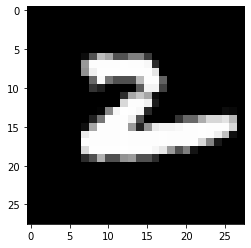

In [41]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');


In [26]:
def activation(x):
    return 1/(1 + torch.exp(-x))
#flatten the imput image
inputs = images.view(images.shape[0], -1)

w1 = torch.randn(784,256) # input of size 784  and hidden layer of size 256 units
b1 = torch.rand(256)
w2 = torch.rand(256, 10) #input size = 256 and output size = 10
b2 = torch.randn(10)
h = activation(torch.mm(inputs, w1) + b1)
output = torch.mm(h,w2)  + b2
print(output)




             






tensor([[54.3974, 57.2516, 62.3349, 52.2795, 60.3537, 61.5878, 64.9535, 56.3802,
         57.8540, 61.9854],
        [59.8888, 63.7722, 68.9709, 55.7165, 62.8286, 65.7276, 70.4693, 61.4447,
         61.5332, 67.1671],
        [56.6786, 62.1224, 64.0732, 54.6518, 63.0029, 65.1177, 65.3763, 60.8004,
         62.9298, 69.1964],
        [53.6850, 55.8681, 58.0499, 48.4773, 58.7180, 59.9097, 60.6493, 55.9537,
         56.1807, 56.9527],
        [56.0023, 62.0699, 62.1480, 56.1848, 65.0239, 65.3634, 63.9500, 58.5083,
         61.0725, 63.0469],
        [54.4998, 59.3937, 65.3699, 53.9169, 59.8964, 60.4730, 67.2531, 61.1620,
         59.0925, 63.9388],
        [57.2290, 57.5504, 64.5919, 53.4405, 58.7481, 61.1103, 62.0638, 57.4011,
         56.4891, 63.0191],
        [58.5900, 62.9406, 69.8036, 58.0192, 66.7964, 64.4529, 69.5867, 62.9596,
         61.7520, 66.0145],
        [57.9692, 62.4496, 68.5003, 56.1458, 64.2494, 64.7747, 67.6301, 62.5500,
         63.1196, 67.7005],
        [55.7891, 5

In [27]:
## Solution
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

probabilities = softmax(output)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [62]:
#Buiding neural Network with pytorch
from torch import nn
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        #Inputs to hidden layer transformation
        self.hidden = nn.Linear(784,256)
        self.output = nn. Linear(256,10)
        self.sigmoid = nn.Sigmoid()
        self.softmax= nn.Softmax(dim=1)
    def forward(self,x):
        x = self.hidden(x)
        x= self.sigmoid(x)
        x = self.output(x)
        x= self.softmax(x)
        return x


        
        
        
    



In [63]:
#creating a network object 
model =Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [64]:
#Alternative way to build network object
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

In [65]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

In [78]:
#Create a network with 784 input units, a hidden layer with 128 units and a ReLU activation, then a hidden layer 
#with 64 units and a ReLU activation, and finally an output layer with a softmax activation as shown above. 
#You can use a ReLU activation with the nn.ReLU module or F.relu function.

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn. Linear(784,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,10)
        
    def forward(self,x):
        x = self.fc1(x)
        x= F.relu(x)
        x= self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x=F.softmax(x, dim=1)
        
        return x
        
        
        



In [79]:
model= Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [80]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[ 0.0023, -0.0325,  0.0204,  ..., -0.0119,  0.0229, -0.0044],
        [-0.0070, -0.0062,  0.0336,  ..., -0.0261, -0.0026,  0.0356],
        [-0.0130, -0.0292, -0.0276,  ...,  0.0133, -0.0348,  0.0005],
        ...,
        [-0.0167,  0.0073,  0.0269,  ...,  0.0181, -0.0067,  0.0087],
        [-0.0286,  0.0098, -0.0087,  ..., -0.0199, -0.0186,  0.0067],
        [ 0.0105,  0.0251, -0.0312,  ..., -0.0119, -0.0245, -0.0207]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0167, -0.0248, -0.0117, -0.0280,  0.0328, -0.0286, -0.0134,  0.0351,
         0.0175, -0.0053, -0.0195, -0.0280, -0.0346, -0.0092,  0.0191, -0.0144,
         0.0174, -0.0144,  0.0092, -0.0089, -0.0150, -0.0121, -0.0169,  0.0028,
         0.0100,  0.0079,  0.0201,  0.0100,  0.0043,  0.0151, -0.0330, -0.0088,
         0.0105, -0.0038, -0.0075,  0.0322,  0.0118,  0.0345, -0.0148,  0.0003,
         0.0049,  0.0060,  0.0337, -0.0292, -0.0258,  0.0009, -0.0034,  0.0069,
        -0.0228

In [81]:
## Set biases to all zeros
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [82]:
# sample from random normal with standard dev = 0.01
model.fc1.weight.data.normal_(std=0.01)

tensor([[ 0.0053, -0.0184,  0.0019,  ..., -0.0030, -0.0108,  0.0111],
        [-0.0105, -0.0073, -0.0159,  ..., -0.0121,  0.0038,  0.0034],
        [ 0.0057, -0.0016,  0.0079,  ..., -0.0109, -0.0005, -0.0116],
        ...,
        [-0.0043,  0.0115, -0.0067,  ..., -0.0146, -0.0125, -0.0113],
        [ 0.0135, -0.0095, -0.0257,  ..., -0.0082,  0.0188, -0.0055],
        [-0.0110, -0.0022, -0.0046,  ...,  0.0045, -0.0139,  0.0109]])

In [83]:
images[0,:]

tensor([[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -0.7255,  0.7569,  0.9922,  0.2157, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -

tensor([[0.0930, 0.1003, 0.1094, 0.1050, 0.0930, 0.0981, 0.0943, 0.1034, 0.1034,
         0.1000]], grad_fn=<SoftmaxBackward0>)


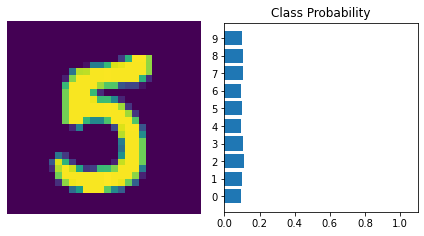

In [84]:
import helper
# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])
print(ps)
img = images[img_idx]
#print(img)
helper.view_classify(img.view(1, 28, 28), ps)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


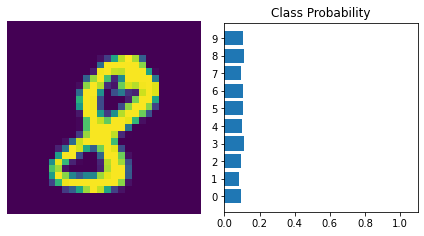

In [85]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), ps)

In [86]:
print(model[0])
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[-0.0094,  0.0120, -0.0251,  ..., -0.0118,  0.0046,  0.0206],
        [-0.0185, -0.0072, -0.0114,  ...,  0.0279, -0.0102, -0.0094],
        [ 0.0299,  0.0218, -0.0325,  ..., -0.0017,  0.0317,  0.0129],
        ...,
        [-0.0084,  0.0290,  0.0009,  ..., -0.0155,  0.0211, -0.0355],
        [ 0.0014, -0.0278, -0.0272,  ...,  0.0040, -0.0279,  0.0011],
        [-0.0287, -0.0006,  0.0101,  ..., -0.0215, -0.0062,  0.0340]],
       requires_grad=True)

In [87]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [88]:
print(model[0])
print(model.fc1)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)


In [ ]:
#Training Neural Networks


In [108]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, ), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [109]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))

# Define the loss
criterion = nn.CrossEntropyLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.2982, grad_fn=<NllLossBackward0>)


In [112]:
#Build a model that returns the log-softmax as the output and calculate the loss using the negative log likelihood los

# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

# Define the loss
criterion = nn.NLLLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our log-probabilities
logps = model(images)
# Calculate the loss with the logps and the labels
loss = criterion(logps, labels)

print(loss)

tensor(2.3407, grad_fn=<NllLossBackward0>)


In [113]:
x = torch.randn(2,2, requires_grad=True)
print(x)

tensor([[ 0.4627,  0.4407],
        [ 0.1293, -1.0827]], requires_grad=True)


In [114]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0007,  0.0007,  0.0007,  ...,  0.0007,  0.0007,  0.0007],
        [-0.0032, -0.0032, -0.0032,  ..., -0.0032, -0.0032, -0.0032],
        [ 0.0037,  0.0037,  0.0037,  ...,  0.0037,  0.0037,  0.0037],
        ...,
        [-0.0058, -0.0058, -0.0058,  ..., -0.0058, -0.0058, -0.0058],
        [-0.0056, -0.0056, -0.0056,  ..., -0.0056, -0.0056, -0.0056],
        [-0.0011, -0.0011, -0.0011,  ..., -0.0011, -0.0011, -0.0011]])


In [115]:
#Training the network!
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [116]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.0122, -0.0274,  0.0191,  ..., -0.0104, -0.0325,  0.0135],
        [-0.0135,  0.0130,  0.0054,  ..., -0.0098,  0.0303,  0.0352],
        [-0.0295,  0.0162, -0.0309,  ..., -0.0304,  0.0020,  0.0311],
        ...,
        [ 0.0093, -0.0004,  0.0334,  ...,  0.0354,  0.0347, -0.0097],
        [-0.0027, -0.0087, -0.0283,  ...,  0.0226,  0.0038, -0.0241],
        [ 0.0244,  0.0025, -0.0249,  ..., -0.0144, -0.0316, -0.0119]],
       requires_grad=True)
Gradient - tensor([[ 0.0022,  0.0022,  0.0022,  ...,  0.0022,  0.0022,  0.0022],
        [-0.0021, -0.0021, -0.0021,  ..., -0.0021, -0.0021, -0.0021],
        [ 0.0017,  0.0017,  0.0017,  ...,  0.0017,  0.0017,  0.0017],
        ...,
        [-0.0021, -0.0021, -0.0021,  ..., -0.0021, -0.0021, -0.0021],
        [-0.0080, -0.0080, -0.0080,  ..., -0.0080, -0.0080, -0.0080],
        [ 0.0020,  0.0020,  0.0020,  ...,  0.0020,  0.0020,  0.0020]])


In [117]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 0.0122, -0.0274,  0.0191,  ..., -0.0104, -0.0326,  0.0135],
        [-0.0134,  0.0130,  0.0055,  ..., -0.0098,  0.0303,  0.0352],
        [-0.0295,  0.0162, -0.0309,  ..., -0.0304,  0.0019,  0.0311],
        ...,
        [ 0.0093, -0.0004,  0.0334,  ...,  0.0355,  0.0347, -0.0097],
        [-0.0026, -0.0087, -0.0282,  ...,  0.0227,  0.0039, -0.0240],
        [ 0.0244,  0.0025, -0.0249,  ..., -0.0144, -0.0317, -0.0119]],
       requires_grad=True)


In [118]:
#mplement the training pass for our network. If you implemented it correctly, 
#you should see the training loss drop with each epoch.

model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.8505195487282677
Training loss: 0.8288572883999932
Training loss: 0.5221509463878583
Training loss: 0.42698121290089985
Training loss: 0.38297681763037433


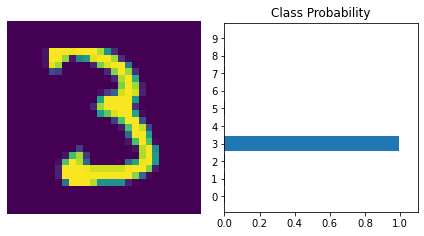

In [119]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)